# 학습데이터 처리 : 데이터 살펴보기 with Pandas
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 한글 깨짐 해결하기
import matplotlib.font_manager as fm  #매트플랏라이브러리 도움으로 폰트매니저 사용
import matplotlib

font_location = 'C:/Windows/Fonts/H2HDRM.TTF'

font_name = fm.FontProperties(fname = font_location).get_name() 

matplotlib.rc('font', family=font_name)

# ▶ 시도별 전출입 인구수

In [3]:
df = pd.read_excel('../dataset/학습데이터처리_Data/시도별 전출입 인구수.xlsx')
df.head(3)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    19 non-null     object
 1   전입지별    325 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    325 non-null    object
 17  1985    325 non-null    object
 18  1986    325 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

## ```df.fillna()``` 기본 사용법
```python
df.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
```
- value : 결측값을 대체할 값입니다. dict형태로도 가능합니다.
- method : 결측값을 변경할 방식입니다. bfill로 할경우 결측값을 바로 아래 값과 동일하게 변경합니다.
    - ffill로 할 경우 결측값을 바로 위 값과 동일하게 변경합니다.
- axis : {0 : index / 1 : columns} fillna 메서드를 적용할 레이블입니다.
- inplace : 원본을 변경할지 여부입니다. True일 경우 원본을 변경하게 됩니다.
- limit : 결측값을 변경할 횟수입니다. 위에서부터 limit로 지정된 갯수만큼만 변경합니다.
- downcast : 다운캐스트할지 여부입니다. downcast='infer'일 경우 float64를 int64로 변경합니다.

In [5]:
# '전출지별' 피처는 똑같은 값들이 반복되지 않고 첫 값 이후로는 null로 지정되어 있음. 그걸 채워주기 위한 작업
df = df.fillna(method='ffill')
df.head(30)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
6,전국,광주광역시,-,-,-,-,-,-,-,-,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138
7,전국,대전광역시,-,-,-,-,-,-,-,-,...,263532,252424,262432,264244,239635,230858,239559,220774,219252,211449
8,전국,울산광역시,-,-,-,-,-,-,-,-,...,181662,159953,161146,164963,161433,159492,176015,170393,148190,135199
9,전국,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,32784,23805,56526,83994,65052,82073


## ▷ mask 사용해보기
### 1. 서울특별시 -> 대구광역시 이동한 인구 파악해보기

In [7]:
mask_dg = (df['전출지별'] == '서울특별시') & (df['전입지별'] == '대구광역시')
mask_dg

0      False
1      False
2      False
3      False
4      False
       ...  
320    False
321    False
322    False
323    False
324    False
Length: 325, dtype: bool

In [8]:
df_daegu = df[mask_dg]
df_daegu.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891


In [9]:
df_daegu.replace('-', 0, inplace=True)  # -로 표현된 0명을 숫자로 변경해주기
df_daegu.drop(['전출지별', '전입지별'], axis=1, inplace=True)  # 어차피 서울 출발인 데이터들만 있으니 전출지 필요없어서 삭제
df_daegu

C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/3938322086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daegu.replace('-', 0, inplace=True)  # -로 표현된 0명을 숫자로 변경해주기
C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/3938322086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daegu.drop(['전출지별', '전입지별'], axis=1, inplace=True)  # 어차피 서울 출발인 데이터들만 있으니 전출지 필요없어서 삭제


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
22,0,0,0,0,0,0,0,0,0,0,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891


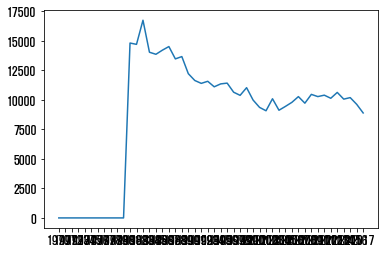

In [10]:
sr_daegu = df_daegu.iloc[0, :]

plt.plot(sr_daegu)
plt.show()

### 2. 서울 -> 경기도

In [12]:
mask_gg = (df['전출지별'] == '서울특별시') & (df['전입지별'] == '경기도')
df_gg = df[mask_gg]
df_gg.replace('-', 0, inplace=True)  # -로 표현된 0명을 숫자로 변경해주기
df_gg.drop(['전출지별', '전입지별'], axis=1, inplace=True)  # 어차피 서울 출발인 데이터들만 있으니 전출지 필요없어서 삭제
sr_gg = df_gg.iloc[0, :]

C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/1296884923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gg.replace('-', 0, inplace=True)  # -로 표현된 0명을 숫자로 변경해주기
C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/1296884923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gg.drop(['전출지별', '전입지별'], axis=1, inplace=True)  # 어차피 서울 출발인 데이터들만 있으니 전출지 필요없어서 삭제


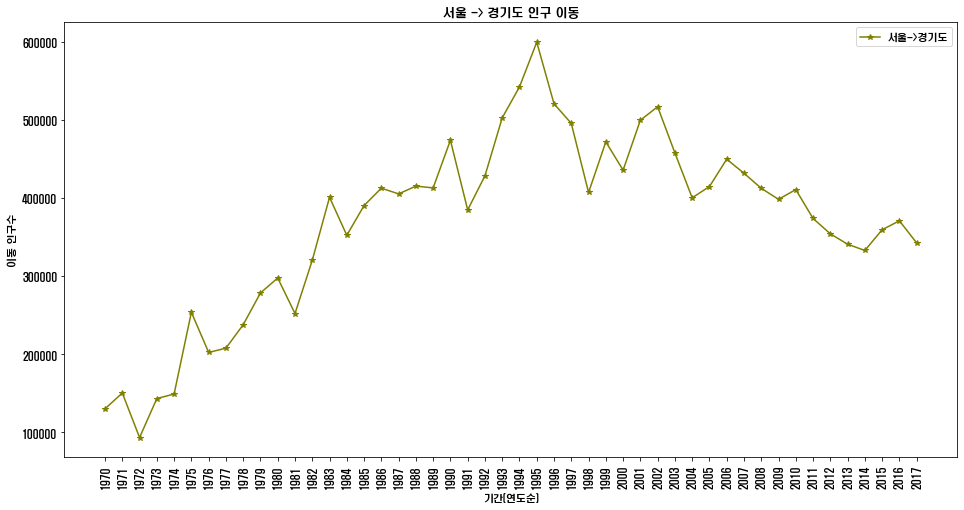

In [13]:
# figsize : inch (1 inch = 2.5cm)
plt.figure(figsize=(16,8))
plt.xticks(rotation='vertical')   # x축 이름 세로로 세우기
plt.plot(sr_gg, markersize=6, color='olive', marker='*')

plt.title("서울 -> 경기도 인구 이동")
plt.xlabel("기간(연도순)")
plt.ylabel("이동 인구수")
plt.legend(labels=['서울->경기도'], loc='best')  # 범례는 반드시 plt.plot() 이후에  설정해야 함
plt.show()

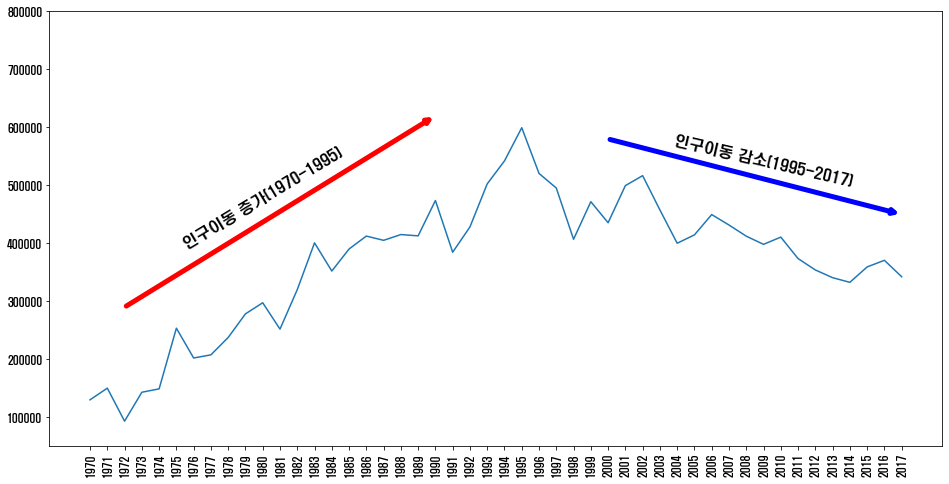

In [34]:
# 차트에 comment, annotation 달기
plt.figure(figsize=(16,8))

plt.plot(sr_gg.index, sr_gg.values)
plt.xticks(rotation='vertical')   # x축 이름 세로로 세우기

# y축 범위 지정 : ylim(min, max)
plt.ylim(50000, 800000)

# annotation 표시 : 화살표
plt.annotate('', # 표시할 문자
            xy=(20, 620000),  # 화살표의 머리 부분, 끝부분 (화살촉이 있는 부분)
            xytext=(2, 290000),  # 화살표의 꼬리 부분(시작점)
            xycoords='data',  # 데이터 값에 따라 알아서 움직이도록
            arrowprops=dict(arrowstyle='->', color='red', lw=5)  # dict타입으로 줘야 함  # lw=lane width
            )
plt.annotate('인구이동 증가(1970-1995)', # 표시할 문자
            xy=(10, 390000),   # text 기준점 (대략 화살표의 중간)
            rotation=31,
            va='baseline',  # vertical align
            ha='center',  # horizon align
            fontsize=15,
            )

plt.annotate('', # 표시할 문자
            xy=(47, 450000),  # 화살표의 머리 부분, 끝부분 (화살촉이 있는 부분)
            xytext=(30, 580000),  # 화살표의 꼬리 부분(시작점)
            xycoords='data',  # 데이터 값에 따라 알아서 움직이도록
            arrowprops=dict(arrowstyle='->', color='blue', lw=5)  # dict타입으로 줘야 함  # lw=lane width
            )
plt.annotate('인구이동 감소(1995-2017)', # 표시할 문자
            xy=(39, 500000),   # text 기준점 (대략 화살표의 중간)
            rotation=-13,
            va='baseline',  # vertical align
            ha='center',  # horizon align
            fontsize=15,
            )
plt.show()

### 위 두 셀 합해서 해보기

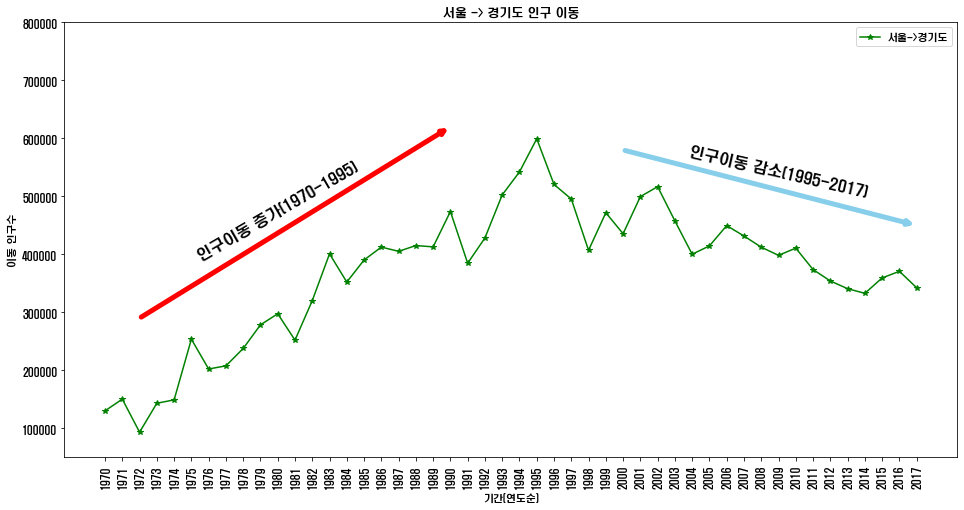

In [35]:
plt.figure(figsize=(16,8))
plt.xticks(rotation='vertical')   # x축 이름 세로로 세우기
plt.plot(sr_gg.index, sr_gg.values, markersize=6, color='green', marker='*')

plt.title("서울 -> 경기도 인구 이동")
plt.xlabel("기간(연도순)")
plt.ylabel("이동 인구수")
plt.legend(labels=['서울->경기도'], loc='best')  # 범례는 반드시 plt.plot() 이후에  설정해야 함

plt.ylim(50000, 800000)

plt.annotate('', # 표시할 문자
            xy=(20, 620000),  # 화살표의 머리 부분, 끝부분 (화살촉이 있는 부분)
            xytext=(2, 290000),  # 화살표의 꼬리 부분(시작점)
            xycoords='data',  # 데이터 값에 따라 알아서 움직이도록
            arrowprops=dict(arrowstyle='->', color='red', lw=5)  # dict타입으로 줘야 함  # lw=lane width
            )
plt.annotate('인구이동 증가(1970-1995)', # 표시할 문자
            xy=(10, 390000),   # text 기준점 (대략 화살표의 중간)
            rotation=30,
            va='baseline',  # vertical align
            ha='center',  # horizon align
            fontsize=15,
            )

plt.annotate('', # 표시할 문자
            xy=(47, 450000),  # 화살표의 머리 부분, 끝부분 (화살촉이 있는 부분)
            xytext=(30, 580000),  # 화살표의 꼬리 부분(시작점)
            xycoords='data',  # 데이터 값에 따라 알아서 움직이도록
            arrowprops=dict(arrowstyle='->', color='skyblue', lw=5)  # dict타입으로 줘야 함  # lw=lane width
            )
plt.annotate('인구이동 감소(1995-2017)', # 표시할 문자
            xy=(39, 500000),   # text 기준점 (대략 화살표의 중간)
            rotation=-13,
            va='baseline',  # vertical align
            ha='center',  # horizon align
            fontsize=15,
            )

plt.show()

C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/1538087837.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_daegu.index, rotation='vertical')
C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/1538087837.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_gg.index, rotation='vertical')


[Text(0, 0, '1970'),
 Text(1, 0, '1971'),
 Text(2, 0, '1972'),
 Text(3, 0, '1973'),
 Text(4, 0, '1974'),
 Text(5, 0, '1975'),
 Text(6, 0, '1976'),
 Text(7, 0, '1977'),
 Text(8, 0, '1978'),
 Text(9, 0, '1979'),
 Text(10, 0, '1980'),
 Text(11, 0, '1981'),
 Text(12, 0, '1982'),
 Text(13, 0, '1983'),
 Text(14, 0, '1984'),
 Text(15, 0, '1985'),
 Text(16, 0, '1986'),
 Text(17, 0, '1987'),
 Text(18, 0, '1988'),
 Text(19, 0, '1989'),
 Text(20, 0, '1990'),
 Text(21, 0, '1991'),
 Text(22, 0, '1992'),
 Text(23, 0, '1993'),
 Text(24, 0, '1994'),
 Text(25, 0, '1995'),
 Text(26, 0, '1996'),
 Text(27, 0, '1997'),
 Text(28, 0, '1998'),
 Text(29, 0, '1999'),
 Text(30, 0, '2000'),
 Text(31, 0, '2001'),
 Text(32, 0, '2002'),
 Text(33, 0, '2003'),
 Text(34, 0, '2004'),
 Text(35, 0, '2005'),
 Text(36, 0, '2006'),
 Text(37, 0, '2007'),
 Text(38, 0, '2008'),
 Text(39, 0, '2009'),
 Text(40, 0, '2010'),
 Text(41, 0, '2011'),
 Text(42, 0, '2012'),
 Text(43, 0, '2013'),
 Text(44, 0, '2014'),
 Text(45, 0, '2015')

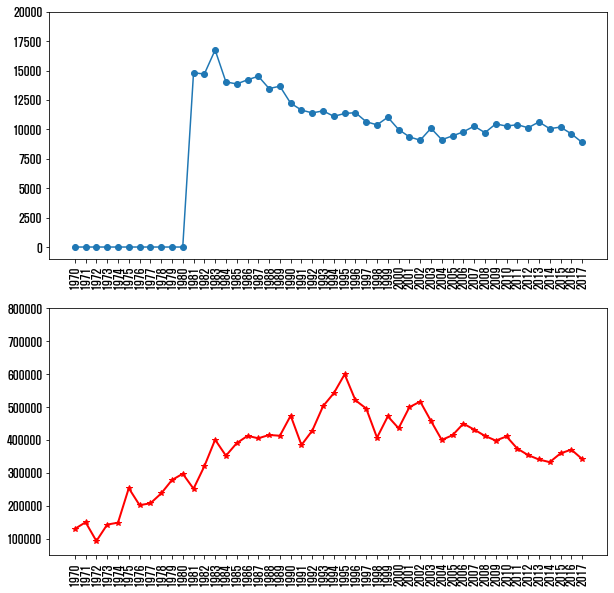

In [36]:
fig = plt.figure(figsize=(10, 10))

# add_subplot(구성된 행, 구성된 열, 위치할 순서)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(sr_daegu, marker='o')
ax2.plot(sr_gg, marker='*', color='red', linewidth=2)

ax1.set_ylim(-1000, 20000)
ax2.set_ylim(50000, 800000)

# x축 라벨의 기울기 설정
ax1.set_xticklabels(sr_daegu.index, rotation='vertical')
ax2.set_xticklabels(sr_gg.index, rotation='vertical')

# ▶ map(함수, 리스트)
: 리스트의 요소를 지정된 함수로 처리해주는 함수

In [37]:
print(range(1970, 1980))

range(1970, 1980)


In [38]:
print(list(range(1970, 1980)))

[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]


### int -> str 만들기
아래 두 셀은 같은 내용임

In [39]:
var_list = []
for var in range(1970, 1980):
    var_list.append(str(var))

In [40]:
list(map(str, range(1970, 1980)))

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979']

In [41]:
map(str, range(1970, 1980))  # list로 묶어주는 것과 다름

## 3. 서울에서 전출

In [43]:
mask_seolu = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask_seolu]
df_seoul.replace('-', 0, inplace=True)  # -로 표현된 0명을 숫자로 변경해주기
df_seoul.drop(['전출지별'], axis=1, inplace=True)  # 어차피 서울 출발인 데이터들만 있으니 전출지 필요없어서 삭제
df_seoul.set_index('전입지별', inplace=True)

C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/1025703234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.replace('-', 0, inplace=True)  # -로 표현된 0명을 숫자로 변경해주기
C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/1025703234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(['전출지별'], axis=1, inplace=True)  # 어차피 서울 출발인 데이터들만 있으니 전출지 필요없어서 삭제


In [44]:
col_year = list(map(str, range(1970, 2018)))

In [45]:
df_seoul3 = df_seoul.loc[['강원도', '충청북도', '충청남도'], col_year]
df_seoul3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
충청북도,6700,9457,10853,12617,11786,21073,18029,17478,18420,20047,...,15294,15295,15461,15318,14555,13783,14244,14379,14087,13302
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020


C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/984519930.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_year, rotation='vertical')


[Text(0, 0, '1970'),
 Text(1, 0, '1971'),
 Text(2, 0, '1972'),
 Text(3, 0, '1973'),
 Text(4, 0, '1974'),
 Text(5, 0, '1975'),
 Text(6, 0, '1976'),
 Text(7, 0, '1977'),
 Text(8, 0, '1978'),
 Text(9, 0, '1979'),
 Text(10, 0, '1980'),
 Text(11, 0, '1981'),
 Text(12, 0, '1982'),
 Text(13, 0, '1983'),
 Text(14, 0, '1984'),
 Text(15, 0, '1985'),
 Text(16, 0, '1986'),
 Text(17, 0, '1987'),
 Text(18, 0, '1988'),
 Text(19, 0, '1989'),
 Text(20, 0, '1990'),
 Text(21, 0, '1991'),
 Text(22, 0, '1992'),
 Text(23, 0, '1993'),
 Text(24, 0, '1994'),
 Text(25, 0, '1995'),
 Text(26, 0, '1996'),
 Text(27, 0, '1997'),
 Text(28, 0, '1998'),
 Text(29, 0, '1999'),
 Text(30, 0, '2000'),
 Text(31, 0, '2001'),
 Text(32, 0, '2002'),
 Text(33, 0, '2003'),
 Text(34, 0, '2004'),
 Text(35, 0, '2005'),
 Text(36, 0, '2006'),
 Text(37, 0, '2007'),
 Text(38, 0, '2008'),
 Text(39, 0, '2009'),
 Text(40, 0, '2010'),
 Text(41, 0, '2011'),
 Text(42, 0, '2012'),
 Text(43, 0, '2013'),
 Text(44, 0, '2014'),
 Text(45, 0, '2015')

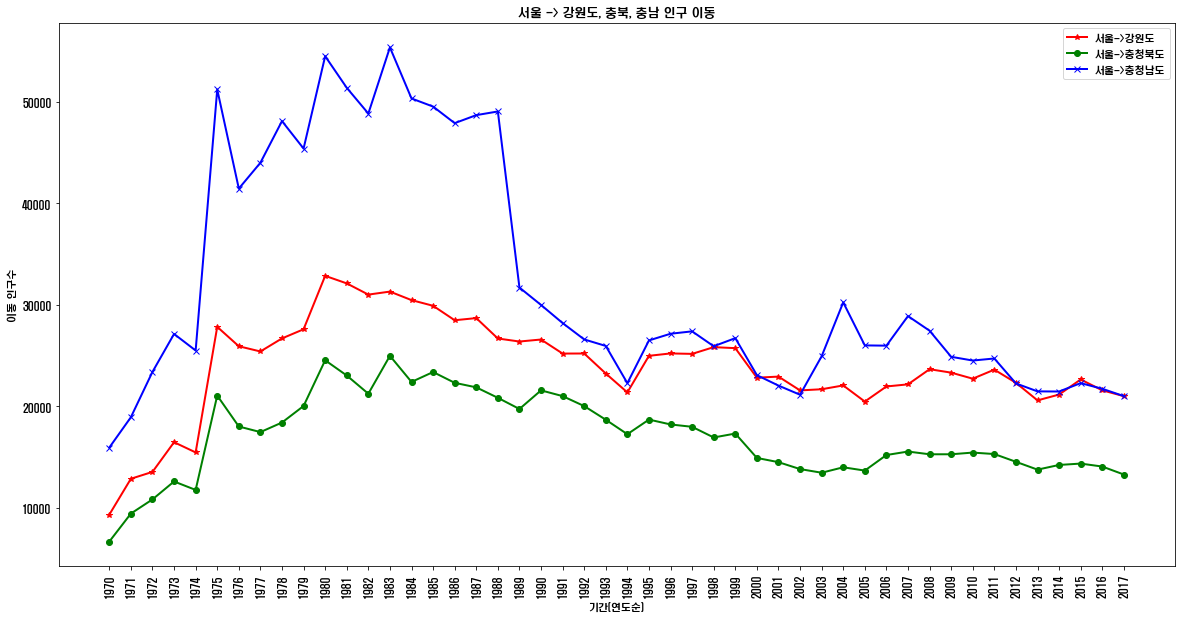

In [48]:
fig = plt.figure(figsize=(20, 10))

# add_subplot(구성된 행, 구성된 열, 위치할 순서)
ax = fig.add_subplot(1, 1, 1)

# x축, data 순으로 입력
ax.plot(col_year, df_seoul3.loc['강원도', :], marker='*', color='red', linewidth=2, label='서울->강원도')
ax.plot(col_year, df_seoul3.loc['충청북도', :], marker='o', color='green', linewidth=2, label='서울->충청북도')
ax.plot(col_year, df_seoul3.loc['충청남도', :], marker='x', color='blue', linewidth=2, label='서울->충청남도')

plt.title("서울 -> 강원도, 충북, 충남 인구 이동")
plt.xlabel("기간(연도순)")
plt.ylabel("이동 인구수")
plt.legend()

# x축 라벨의 기울기 설정
ax.set_xticklabels(col_year, rotation='vertical')

In [47]:
df_seoul4 = df_seoul.loc[['강원도', '경상북도', '충청남도', '전라남도'], col_year]
df_seoul4

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/795219077.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_year, rotation='vertical')
C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/795219077.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_year, rotation='vertical')
C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/795219077.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_year, rotation='vertical')
C:\Users\AI-00\AppData\Local\Temp/ipykernel_65456/795219077.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_year, rotation='vertical')


[Text(0, 0, '1970'),
 Text(1, 0, '1971'),
 Text(2, 0, '1972'),
 Text(3, 0, '1973'),
 Text(4, 0, '1974'),
 Text(5, 0, '1975'),
 Text(6, 0, '1976'),
 Text(7, 0, '1977'),
 Text(8, 0, '1978'),
 Text(9, 0, '1979'),
 Text(10, 0, '1980'),
 Text(11, 0, '1981'),
 Text(12, 0, '1982'),
 Text(13, 0, '1983'),
 Text(14, 0, '1984'),
 Text(15, 0, '1985'),
 Text(16, 0, '1986'),
 Text(17, 0, '1987'),
 Text(18, 0, '1988'),
 Text(19, 0, '1989'),
 Text(20, 0, '1990'),
 Text(21, 0, '1991'),
 Text(22, 0, '1992'),
 Text(23, 0, '1993'),
 Text(24, 0, '1994'),
 Text(25, 0, '1995'),
 Text(26, 0, '1996'),
 Text(27, 0, '1997'),
 Text(28, 0, '1998'),
 Text(29, 0, '1999'),
 Text(30, 0, '2000'),
 Text(31, 0, '2001'),
 Text(32, 0, '2002'),
 Text(33, 0, '2003'),
 Text(34, 0, '2004'),
 Text(35, 0, '2005'),
 Text(36, 0, '2006'),
 Text(37, 0, '2007'),
 Text(38, 0, '2008'),
 Text(39, 0, '2009'),
 Text(40, 0, '2010'),
 Text(41, 0, '2011'),
 Text(42, 0, '2012'),
 Text(43, 0, '2013'),
 Text(44, 0, '2014'),
 Text(45, 0, '2015')

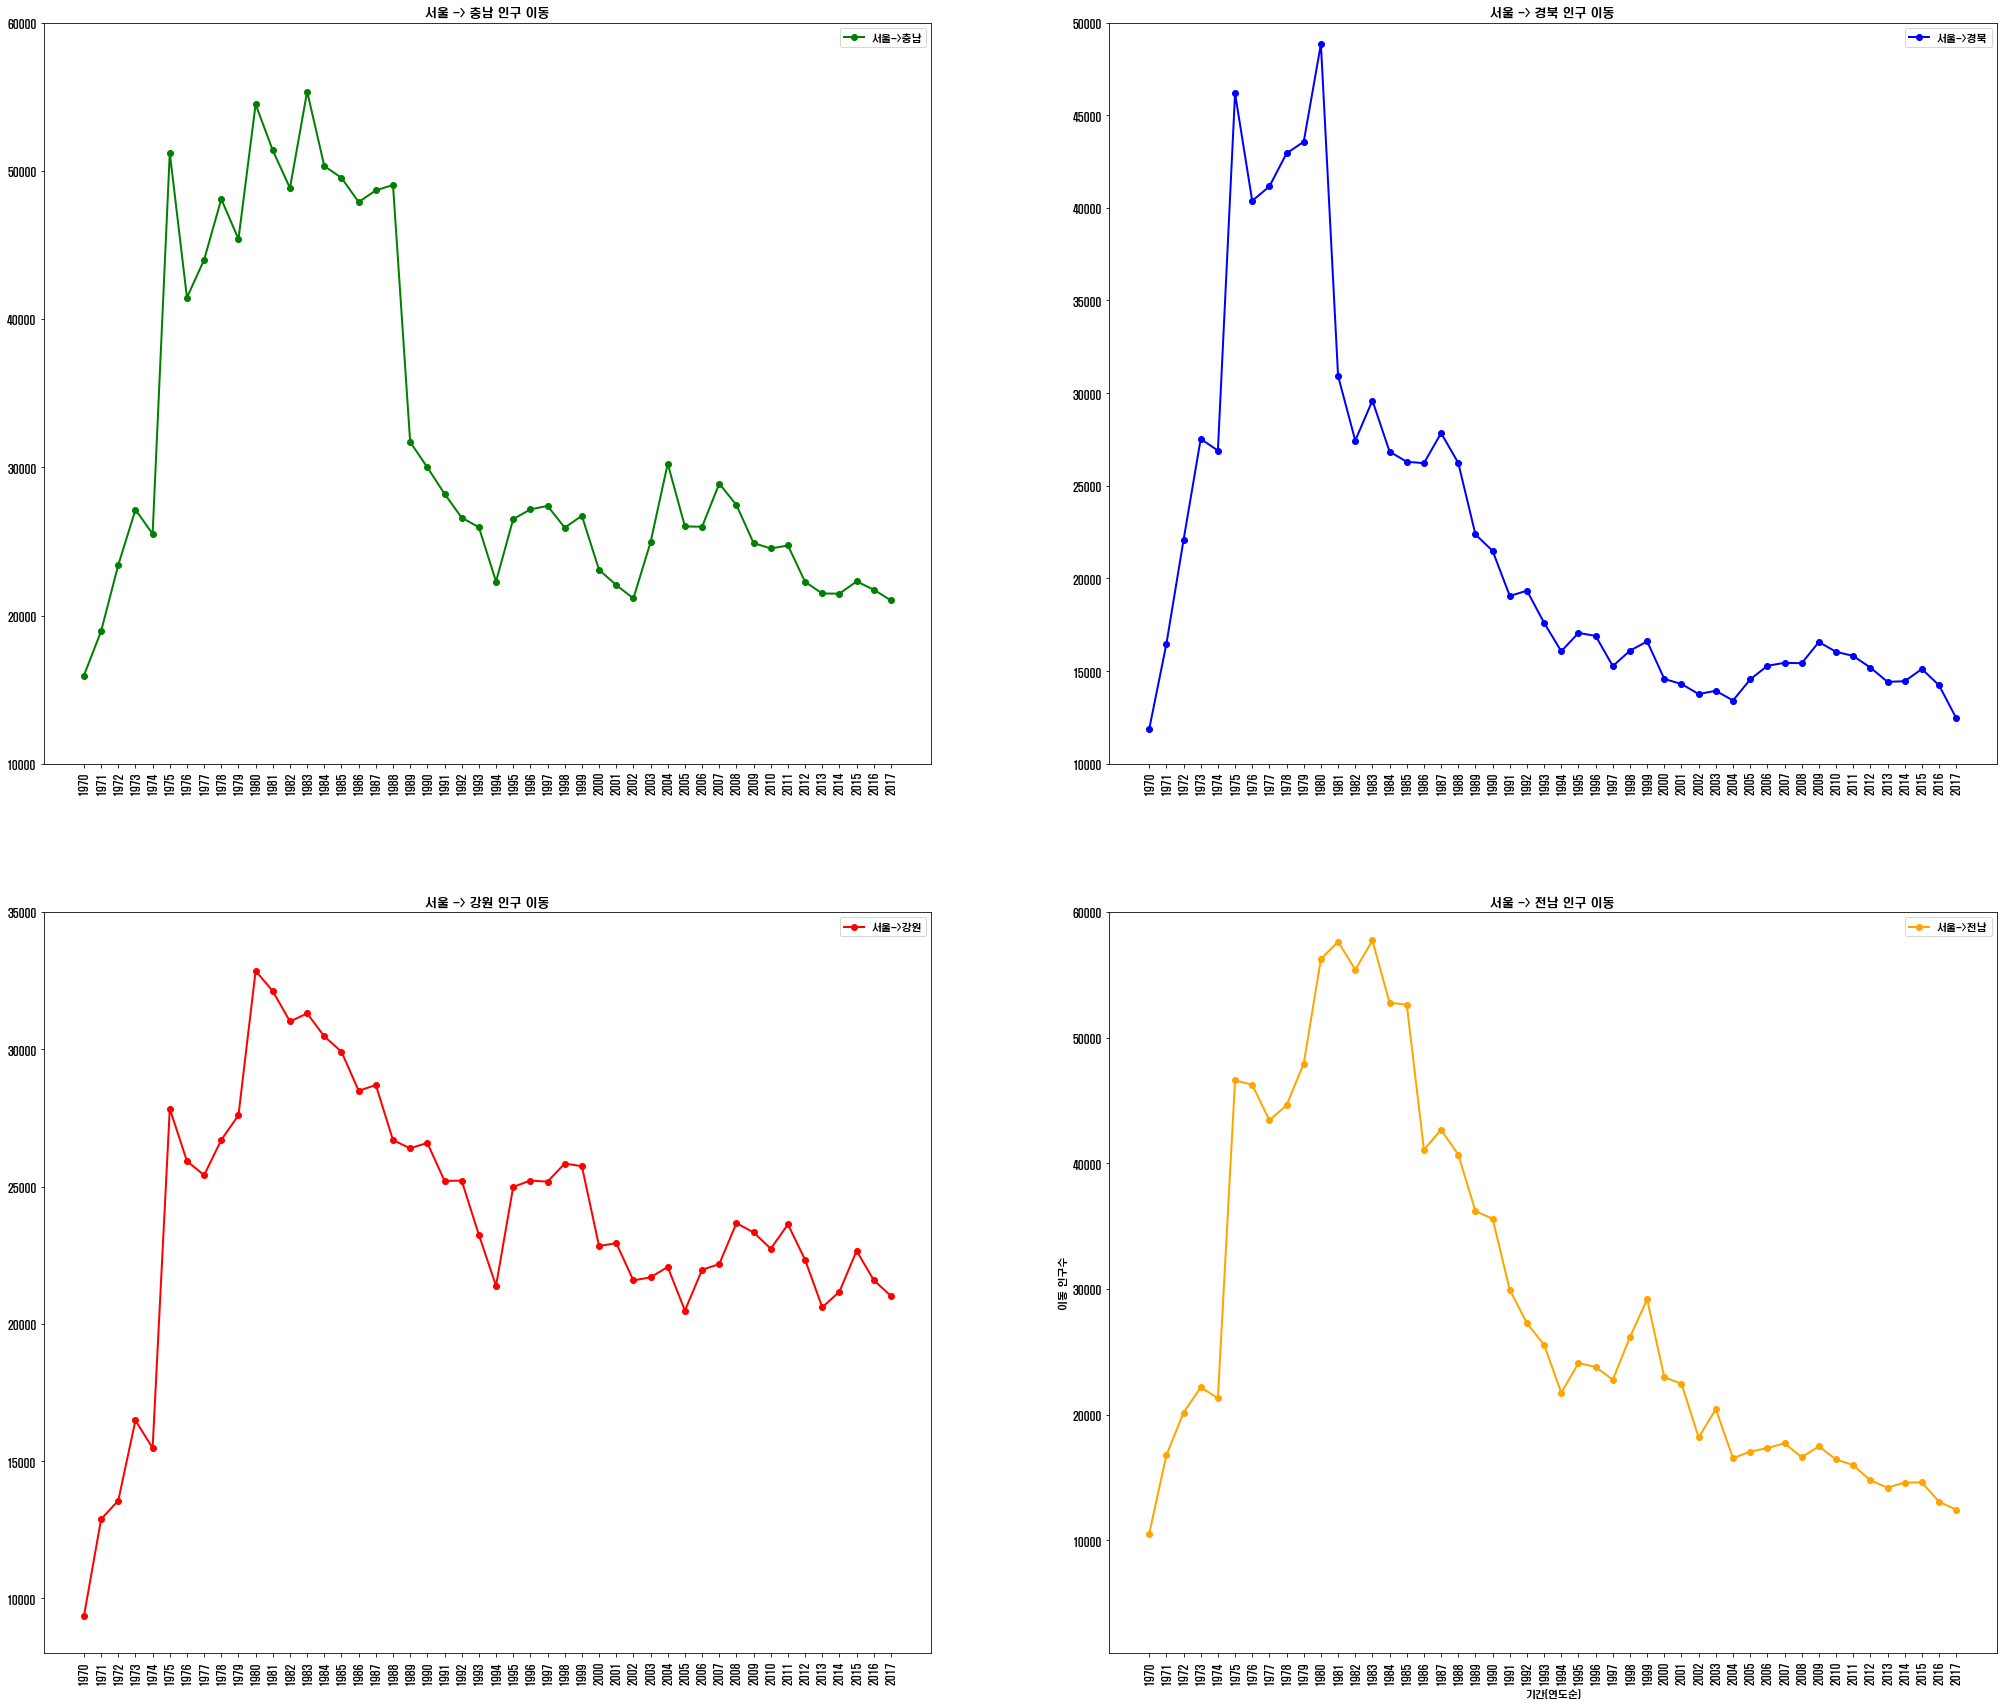

In [74]:
fig = plt.figure(figsize=(35, 30))

# add_subplot(구성된 행, 구성된 열, 위치할 순서)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(col_year, df_seoul4.loc['충청남도', :], marker='o', color='green', linewidth=2, label='서울->충남')
ax2.plot(col_year, df_seoul4.loc['경상북도', :], marker='o', color='blue', linewidth=2, label='서울->경북')
ax3.plot(col_year, df_seoul4.loc['강원도', :], marker='o', color='red', linewidth=2, label='서울->강원')
ax4.plot(col_year, df_seoul4.loc['전라남도', :], marker='o', color='orange', linewidth=2, label='서울->전남')

ax1.set_ylim(10000, 60000)
ax2.set_ylim(10000, 50000)
ax3.set_ylim(8000, 35000)
ax4.set_ylim(1000, 60000)


plt.title("서울 -> 충남, 경북, 강원, 전남 인구 이동")
ax1.set_title("서울 -> 충남 인구 이동")
ax2.set_title("서울 -> 경북 인구 이동")
ax3.set_title("서울 -> 강원 인구 이동")
ax4.set_title("서울 -> 전남 인구 이동")

plt.xlabel("기간(연도순)")
plt.ylabel("이동 인구수")

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

# x축 라벨의 기울기 설정
ax1.set_xticklabels(col_year, rotation='vertical')
ax2.set_xticklabels(col_year, rotation='vertical')
ax3.set_xticklabels(col_year, rotation='vertical')
ax4.set_xticklabels(col_year, rotation='vertical')